In [ ]:
from google.colab import drive
drive.mount('/content/drive')
create_dir = 'anime_reviews_finalProj/'
base_dir = '/content/drive/MyDrive/'

Mounted at /content/drive


In [ ]:
import requests
import pickle
import pandas as pd
import re
import string
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

from bs4 import BeautifulSoup
from typing import List, Dict, Union
from textblob import TextBlob

pd.set_option('max_colwidth', 250)

### The start of our web scraping process
- We gather a list of urls from the MAL site that we use to scrape for 
user reviews


In [ ]:
# A list of sites to scrape user reviews from based on the show
URLS =['https://myanimelist.net/anime/31240/Re_Zero_kara_Hajimeru_Isekai_Seikatsu/reviews',
       'https://myanimelist.net/anime/33674/No_Game_No_Life__Zero/reviews',
       'https://myanimelist.net/anime/37430/Tensei_shitara_Slime_Datta_Ken/reviews',
       'https://myanimelist.net/anime/30831/Kono_Subarashii_Sekai_ni_Shukufuku_wo/reviews',
       'https://myanimelist.net/anime/35790/Tate_no_Yuusha_no_Nariagari/reviews',
       'https://myanimelist.net/anime/29803/Overlord/reviews',
       'https://myanimelist.net/manga/98436/Youjo_Senki/reviews',
       'https://myanimelist.net/anime/249/InuYasha/reviews',
       'https://myanimelist.net/anime/11757/Sword_Art_Online/reviews',
       'https://myanimelist.net/anime/28907/Gate__Jieitai_Kanochi_nite_Kaku_Tatakaeri/reviews',
       'https://myanimelist.net/anime/37210/Isekai_Maou_to_Shoukan_Shoujo_no_Dorei_Majutsu/reviews',
       'https://myanimelist.net/anime/37744/Isekai_Cheat_Magician/reviews',
       'https://myanimelist.net/anime/39535/Mushoku_Tensei__Isekai_Ittara_Honki_Dasu/reviews',
       'https://myanimelist.net/anime/35203/Isekai_wa_Smartphone_to_Tomo_ni/reviews',
       ]
       
# titles of shows corresponding to above urls
TITLES = ['Re:Zero','No Game, No Life','TTIGRAAS',
          'Konosuba','Shield Hero','Overlord','Tanya The Evil',
          'Inuyasha','SaO','Gate: JSDF', 'How Not to Summon a Demon Lord', 
          'Isekai Cheat Magician','Mushoku Tensei: Jobless Reincarnation',
          'In Another world with my smart phone']

# map short titles to full titles
FULL_TITLES = {
    'Re:Zero':                               'Re:Zero - Starting Life in Another World',
    'No Game, No Life':                      'No Game, No Life',
    'TTIGRAAS':                              'The Time I Got Reincarnated As A Slime',
    'Konosuba':                              'KonoSuba',
    'Shield Hero':                           'The Raising of The Shield Hero',
    'Overlord':                              'Overlord',
    'Tanya The Evil':                        'Saga of Tanya The Evil', 
    'Inuyasha':                              'Inuyasha',
    'SaO':                                   'Sword Art Online', 
    'Gate: JSDF':                            'Gate: Thus the Japanese Self-Defense Force Fought There',
    'How Not to Summon a Demon Lord':        'How Not to Summon a Demon Lord',
    'Isekai Cheat Magician':                 'Isekai Cheat Magician',
		'Mushoku Tensei: Jobless Reincarnation': 'Mushoku Tensei: Jobless Reincarnation',
    'In Another world with my smart phone':  'In Another World with My Smart Phone',
}

# color scheme for shows we are plotting
LABEL_COLOR_MAP = {'Gate: JSDF' : 'Black',
                  'How Not to Summon a Demon Lord': 'darkgreen',
                  'In Another world with my smart phone' : 'darkblue',
                  'Inuyasha' : 'Orangered',
                  'Isekai Cheat Magician' : 'Magenta',
                  'Konosuba' : 'Olivedrab',
                  'Mushoku Tensei: Jobless Reincarnation' : 'Goldenrod',
                  'No Game, No Life' : 'darkred',
                  'Overlord' : 'turquoise',
                  'Re:Zero' : 'indigo',
                  'SaO' : 'slategrey',
                  'Shield Hero' : 'chocolate',
                  'TTIGRAAS' : 'lightseagreen',
                  'Tanya The Evil' : 'darkolivegreen',
                  }


In [ ]:
Review = Dict[str, Union[str, int]]
Reviews = List[Review]

# Pulls user reveiws from the MAL (My Anime List) site
def scrape_reivews(url: str) -> Reviews: 
  reviews: Reviews = []
  # make a page request based on query string parameter i.e. ?p=1,2...N
  for i in range(1, 4):
    pageUrl = f'{url}?p={i}'
    page = requests.get(pageUrl)
    if page.status_code != 200:
      print(f'{page.status_code} on {pageUrl}')
      continue
    soup = BeautifulSoup(page.text, "html")
    reviewDivs = soup.find_all('div', attrs={"class": "spaceit textReadability word-break pt8 mt8"})
    if not reviewDivs:
      print(f'no reviews found on {pageUrl}')
      continue
    for reviewDiv in reviewDivs:
      # remove scores table
      scoresTable = reviewDiv.div.extract()
      review: Review = {}
      review['text'] = reviewDiv.text
      for row in scoresTable('tr'):
        cells = row('td')
        review[cells[0].text.lower()] = int(cells[1].text)
      reviews.append(review)
    print(f'{pageUrl} Finished')
  return reviews

### We generate a dictionary 
- Keys = Titles 
- Values = List of reviews

In [ ]:
showReviews = {TITLES[i]: scrape_reivews(URLS[i]) for i in range(0, len(URLS))}

https://myanimelist.net/anime/31240/Re_Zero_kara_Hajimeru_Isekai_Seikatsu/reviews?p=1 Finished
https://myanimelist.net/anime/31240/Re_Zero_kara_Hajimeru_Isekai_Seikatsu/reviews?p=2 Finished
https://myanimelist.net/anime/31240/Re_Zero_kara_Hajimeru_Isekai_Seikatsu/reviews?p=3 Finished
https://myanimelist.net/anime/33674/No_Game_No_Life__Zero/reviews?p=1 Finished
https://myanimelist.net/anime/33674/No_Game_No_Life__Zero/reviews?p=2 Finished
https://myanimelist.net/anime/33674/No_Game_No_Life__Zero/reviews?p=3 Finished
https://myanimelist.net/anime/37430/Tensei_shitara_Slime_Datta_Ken/reviews?p=1 Finished
https://myanimelist.net/anime/37430/Tensei_shitara_Slime_Datta_Ken/reviews?p=2 Finished
https://myanimelist.net/anime/37430/Tensei_shitara_Slime_Datta_Ken/reviews?p=3 Finished
https://myanimelist.net/anime/30831/Kono_Subarashii_Sekai_ni_Shukufuku_wo/reviews?p=1 Finished
https://myanimelist.net/anime/30831/Kono_Subarashii_Sekai_ni_Shukufuku_wo/reviews?p=2 Finished
https://myanimelist.net/

### We Setup a DataFrame for Individual User Reviews to be preprocessed

In [ ]:
columns = ['show', 'text', 'overall', 'story', 'animation', 'sound', 'character', 'enjoyment']
reviews_df = pd.DataFrame(columns=columns)
for show, reviews in showReviews.items():
  # put reviews into DF
  show_df = pd.DataFrame(reviews)
  # set show column and append to main DF
  reviews_df = reviews_df.append(show_df.assign(show=show))
reviews_df.head()

In [ ]:
#convert to int
for col in ['overall', 'story', 'animation', 'sound', 'character', 'enjoyment']:
  reviews_df[col] = pd.to_numeric(reviews_df[col])

In [ ]:
reviews_df_pickle_path = base_dir + create_dir + '/reviews_df.pkl'

In [ ]:
reviews_df.to_pickle(reviews_df_pickle_path)

In [ ]:
reviews_df = pd.read_pickle(reviews_df_pickle_path)
reviews_df.head()

In [ ]:
# Creates a dict of individual user reviews with show as the Key and a list of user reviews generated from the data dictionary as a value
def create_dict_for_indiv_reviews(data, titles):

    new_data = {}
    for title in titles:
      I_reviews = []
      for i, _ in enumerate(data[title]):
        indiv_review = []
        indiv_review.append(data[title][i]['text'])
        I_reviews.append(indiv_review)      
      if title not in new_data: 
          new_data[title] =  I_reviews
    return new_data

# Creates a DataFrame of idividual user reviews from the (create_dict_for_indiv_reviews) function
def create_individual_user_reviews_df(data, titles):   

    indiv_review_dict = create_dict_for_indiv_reviews(data, titles)    
    df_list = []
    for i in range(len(titles)):   
        review_df = pd.DataFrame.from_dict(indiv_review_dict.get(titles[i]))  
        review_df.columns = ['user_reviews'] 
        review_df['show'] = titles[i]
        df_list.append(review_df.copy())
    indiv_revws_df = pd.concat(df_list)
    indiv_revws_df = indiv_revws_df.reset_index(drop=True)
    return indiv_revws_df


In [ ]:
indiv_usr_rvw_df = create_individual_user_reviews_df(showReviews, TITLES)
indiv_usr_rvw_df.head()

In [ ]:
#Save and Load Pickle file for plotting individual User reviews
 
# indiv_usr_rvw_df_pickle_path = base_dir + create_dir + '/indiv_usr_rvw_df.pkl'
# indiv_usr_rvw_df.to_pickle('indiv_usr_rvw_df.pkl')
 
# indiv_usr_rvw_df = pd.read_pickle(indiv_usr_rvw_df_pickle_path)

### We use the following methods to clean and rebuild our user reviews

In [ ]:
def clean_text_round1(text):
  text = text.lower()
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # removing punctuations
  text = re.sub('[^A-Za-z]', ' ', text)  # removing numerical text
  text = re.sub('\s+', ' ', text) # removing extra white space
  return text


def rebuild_clean_df(df): # rebuilds DataFrame to add back labels
    indiv_show_clean = pd.DataFrame(df['user_reviews'].copy().apply(round1))  
    indiv_show_clean = pd.concat([indiv_show_clean, df['show']], axis=1)

    return indiv_show_clean

round1 = lambda x: clean_text_round1(x)
# TODO: We can probably add to the cleaning and preprocessing methods to get better data to calculate the polarity and subjectivity score 

In [ ]:
indiv_show_clean = rebuild_clean_df(indiv_usr_rvw_df)
indiv_show_clean.head()

In [ ]:
# reviews_df.to_pickle(reviews_df_pickle_path)

### Method to process text to add Polarity and Subjectivity rating

In [ ]:
# for DF with 'user_reviews' attribute
def calculate_pol_and_sub_score(df):
    pol = lambda x: TextBlob(x).sentiment.polarity
    sub = lambda x: TextBlob(x).sentiment.subjectivity

    df['polarity'] = df['user_reviews'].apply(pol) # Sentiment inferred as Positive or Negative
    df['subjectivity'] = df['user_reviews'].apply(sub) # Sentiment inferred as Objective or Subjective
    return df

#for DF with 'text' attribute
def add_pol_and_sub(df):
    pol = lambda x: TextBlob(x).sentiment.polarity
    sub = lambda x: TextBlob(x).sentiment.subjectivity

    df['polarity'] = df.text.apply(pol) # Sentiment inferred as Positive or Negative
    df['subjectivity'] = df.text.apply(sub) # Sentiment inferred as Objective or Subjective
    return df

In [ ]:
indiv_show_clean = calculate_pol_and_sub_score(indiv_show_clean)
indiv_show_clean.head()

In [ ]:
reviews_ps_df = add_pol_and_sub(reviews_df)
reviews_ps_df.head()

In [ ]:
reviews_ps_df_pickle_path = base_dir + create_dir + '/reviews_ps_df.pkl'

In [ ]:
reviews_ps_df.to_pickle(reviews_ps_df_pickle_path)

In [ ]:
reviews_ps_df = pd.read_pickle(reviews_ps_df_pickle_path)
reviews_ps_df.head()

##Calculate Correlation Coefficients between features

In [ ]:
np.corrcoef(reviews_ps_df[['overall', 'story', 'character', 'enjoyment', 'polarity', 'subjectivity']], rowvar=False)

array([[ 1.        ,  0.8121411 ,  0.83703469,  0.83650773,  0.57845936,
        -0.01259487],
       [ 0.8121411 ,  1.        ,  0.89048475,  0.85695921,  0.55081334,
        -0.00449914],
       [ 0.83703469,  0.89048475,  1.        ,  0.87602226,  0.54940217,
        -0.01626372],
       [ 0.83650773,  0.85695921,  0.87602226,  1.        ,  0.51621347,
        -0.02180411],
       [ 0.57845936,  0.55081334,  0.54940217,  0.51621347,  1.        ,
         0.08295368],
       [-0.01259487, -0.00449914, -0.01626372, -0.02180411,  0.08295368,
         1.        ]])

Get P values for most interesting correlation coefficients

In [ ]:
from scipy.stats import pearsonr
corr, p = pearsonr(reviews_ps_df['overall'], reviews_ps_df['polarity'])
print('overall, polarity:', corr, p)
corr, p = pearsonr(reviews_ps_df['overall'], reviews_ps_df['subjectivity'])
print('overall, subjectivity:', corr, p)

overall, polarity: 0.5784593599960486 3.999969079590658e-71
overall, subjectivity: -0.012594872562534089 0.7249264853081641


## Find Linear Regression of Polarity vs Review Score

In [ ]:
# get linear regression of polarity ~ overall score
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(reviews_ps_df.overall.values.reshape((-1, 1)), reviews_ps_df.polarity)
model.intercept_

0.013835966893755575

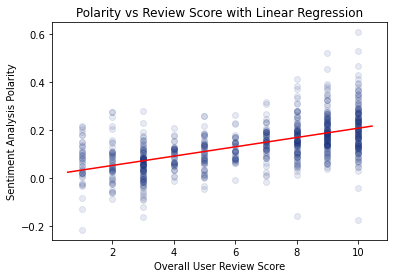

In [ ]:
# plot polarity ~ overall score
plt.scatter(reviews_ps_df.overall, reviews_ps_df.polarity, color=(0.1, 0.2, 0.5, 0.1))
# add regression line
axes = plt.gca()
# get limits of x axis
axes.get_xlim()
x_vals = np.array(axes.get_xlim())
y_vals = model.intercept_ + model.coef_[0] * x_vals
# draw regression line
plt.plot(x_vals, y_vals, color='red')

plt.title('Polarity vs Review Score with Linear Regression')
plt.xlabel('Overall User Review Score')
plt.ylabel('Sentiment Analysis Polarity')
plt.show()

## Plot Reviews by Positivity and Subjectivity

### Plot All Reviews

In [ ]:
def create_title_labels(df):
    title_lbls=[]
    for index, title in enumerate(df.index):
        if indiv_show_clean.show.loc[title] not in title_lbls:
            title_lbls.append(indiv_show_clean.show.loc[title])
    return title_lbls

# Method that plots the objectivity and subjectivity of individual user review
# Takes DF object of shape (N, 3) that has the polarity and subjectivity defined in their own columns to be plotted
# Use lower and upper bound arguments to toggle different lables "on or off"

def view_user_review_sentiment(df,plot_x, plot_y, upper_bound=0, lower_bound=0, trailing=False, leading=False):
 
    title_lbls = create_title_labels(df)

    if upper_bound==0 and lower_bound==0:
      title_switch = title_lbls.copy()
    elif upper_bound <= len(title_lbls) and lower_bound >=0 and upper_bound > lower_bound:
        title_switch = title_lbls.copy()
        title_switch[lower_bound:upper_bound] = ' ' * (upper_bound - lower_bound)
        if trailing:
            title_switch = title_lbls.copy()
            if lower_bound <= 1:  
                title_switch[0 : lower_bound] = ' ' * (lower_bound - 0 )
            else:
                title_switch[0 : (lower_bound+1) ] = ' ' * ((lower_bound+1)- 0 )
        if leading:    
             if lower_bound <= 1:     
               title_switch[(upper_bound) : len(title_lbls)] = ' ' * (len(title_lbls) - (upper_bound))
             else:       
               title_switch[(upper_bound + 1) : len(title_lbls)] = ' ' * (len(title_lbls) - (upper_bound + 1))
    else:
      raise IndexError("Upper or Lower bound values exceed range of show title list")   
      
    label_color_names = [l for l in df.show]

    title_colors = [LABEL_COLOR_MAP[x] if x in LABEL_COLOR_MAP else 'whitesmoke' for x in title_switch]


    scatter = sns.scatterplot(x=plot_x, y=plot_y, hue=label_color_names, palette=title_colors)
    plt.rcParams['figure.figsize'] = [35, 15]
    plt.title('Sentiment Analysis Based on Individual User Reviews', fontsize=20)
    plt.xlabel('<-- Negative ------------------------------------------------ Positive -->', fontsize=15)
    plt.ylabel('<-- Objective ---------------------------------------------- Subjective -->', fontsize=15)
    plt.show()

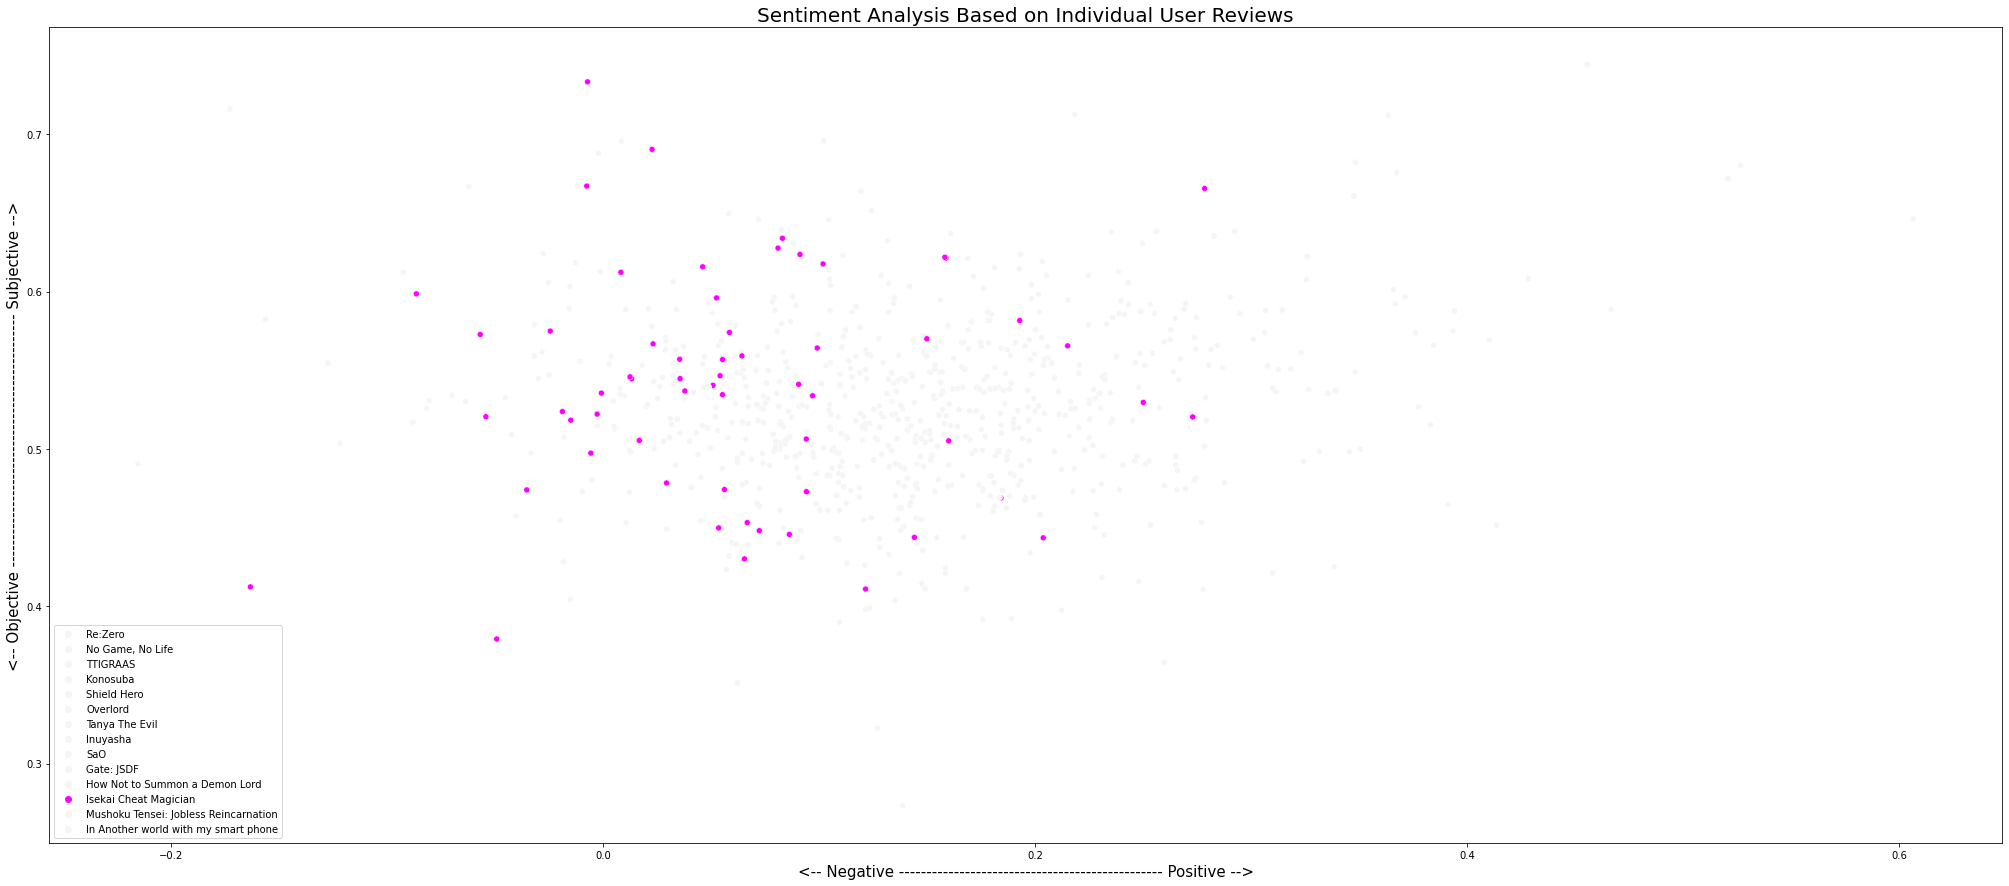

In [ ]:
# We can adjust the upper and lower bound variables to identify which specific labels we want to see plotted clearly
#upper_bound = up_bd, lower_bound = low_bd

up_bd = 11
low_bd =10
trailing=True
leading=True

view_user_review_sentiment(indiv_show_clean, 
                           plot_x = indiv_show_clean['polarity'], 
                           plot_y=indiv_show_clean['subjectivity'], 
                           upper_bound=up_bd, 
                           lower_bound=low_bd,
                           trailing=trailing,
                           leading=leading
                          )

### Plot overall sentiment for each show

In [ ]:

combined_reviews_df = pd.DataFrame(reviews_df.groupby('show')['text'].apply(' '.join))
combined_reviews_df.head()

In [ ]:
combined_reviews_ps_df = add_pol_and_sub(combined_reviews_df)
combined_reviews_ps_df.head()

In [ ]:
combined_reviews_ps_df_pickle_path = base_dir + create_dir + '/combined_reviews_ps_df.pkl'

In [ ]:
combined_reviews_ps_df.to_pickle(combined_reviews_ps_df_pickle_path)

In [ ]:
combined_reviews_ps_df = pd.read_pickle(combined_reviews_ps_df_pickle_path)
combined_reviews_ps_df.head()

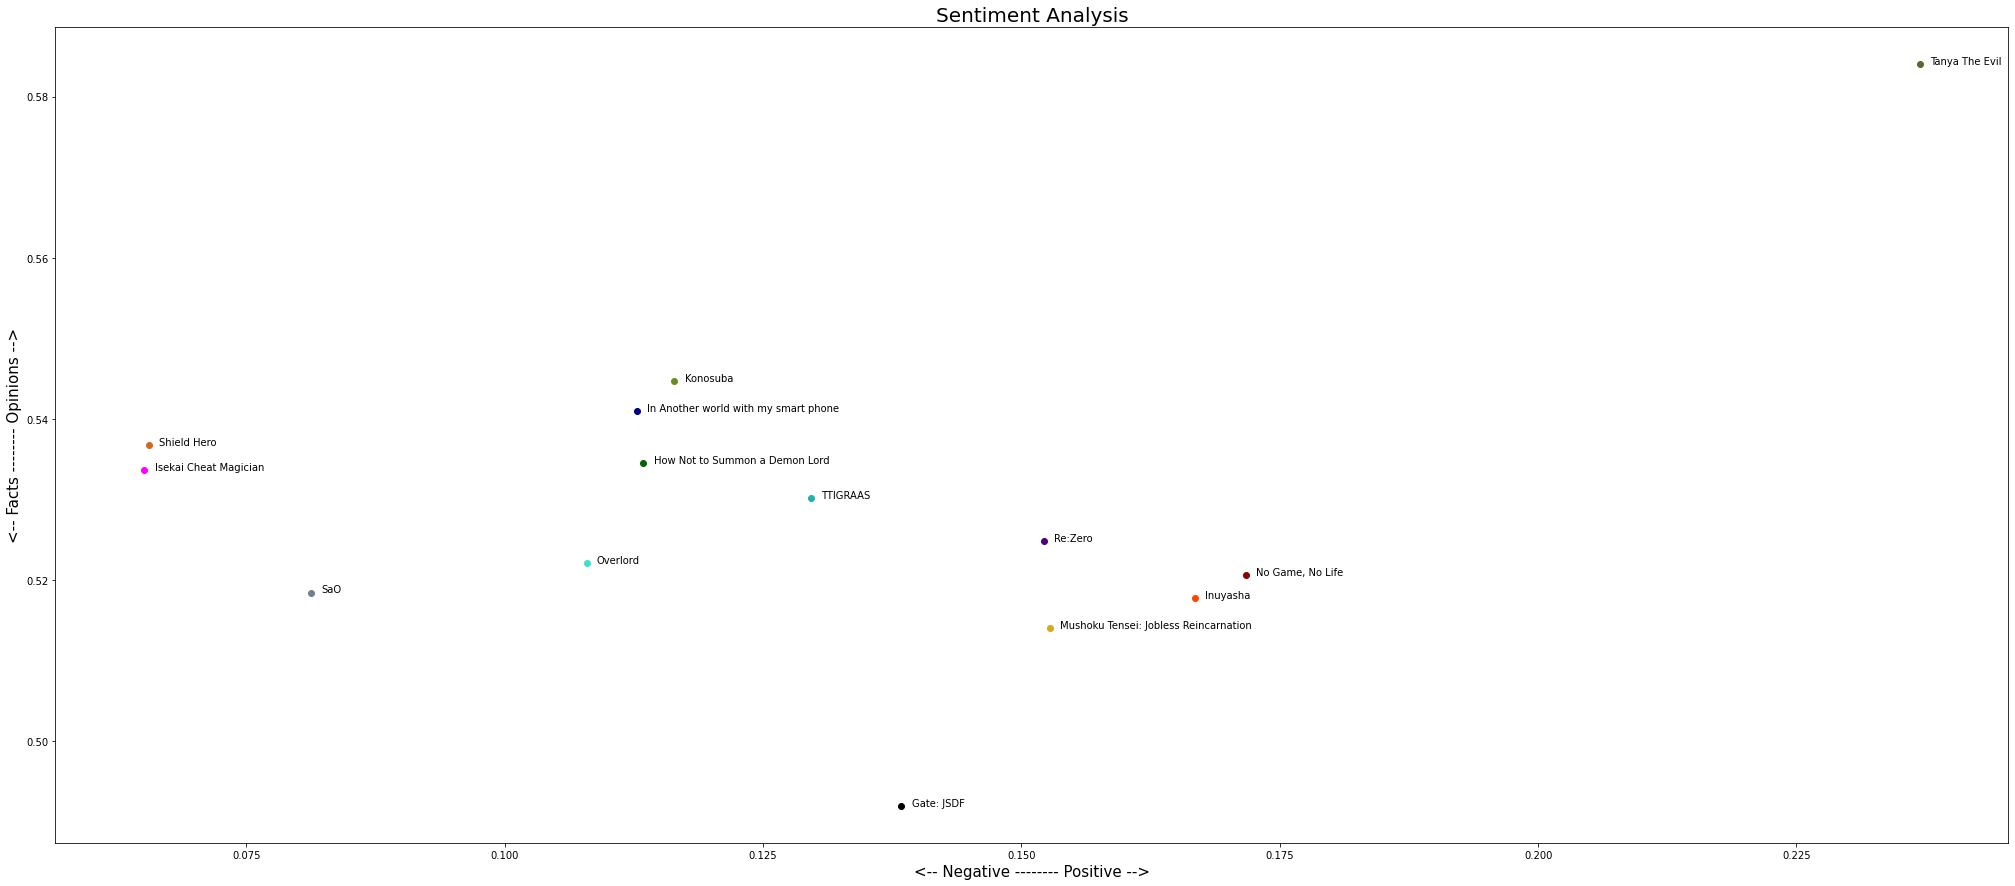

In [ ]:
# combined_reviews_ps_df_T = combined_reviews_ps_df.transpose()
plt.rcParams['figure.figsize'] = [35, 15]
for show, row in combined_reviews_ps_df.iterrows():
  x = row.polarity
  y = row.subjectivity
  plt.scatter(x, y, color=LABEL_COLOR_MAP[show])#, label=show)
  plt.annotate(show, (x + .001, y))
  #plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
  #plt.xlim(-.01, .12) 


plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
#plt.legend()

plt.show()

## Build Word Clouds to see most common words by show

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Using the countvectorizer module we can build a dtm

cv = CountVectorizer(stop_words='english')
reviews_cv = cv.fit_transform(combined_reviews_df.text)
reviews_dtm = pd.DataFrame(reviews_cv.toarray(), columns = cv.get_feature_names())
reviews_dtm.index = combined_reviews_df.index
reviews_dtm.head()

In [ ]:
reviews_dtm_pickle_path = base_dir + create_dir + '/reviews_dtm.pkl'

In [ ]:
reviews_dtm.to_pickle(reviews_dtm_pickle_path)

### Find words common to every show reviews. These words need to be removed to help highlight what is unique about each show's reviews

In [ ]:
# we can veiw the top 50 words for a given show
top_dict = {}
reviews_dtm_T = reviews_dtm.transpose()
for show in reviews_dtm_T.columns:
  top = reviews_dtm_T[show].sort_values(ascending=False).head(50)
  top_dict[show] = list(zip(top.index, top.values))

top_dict

In [ ]:
from collections import Counter

# we can view the most frequent common words across all shows
words = []
for show in reviews_dtm_T.columns:
  top = [word for word, count in top_dict[show]]
  for t in top:
    words.append(t)

Counter(words)

In [ ]:
# Remove words that show up in at least half of the top 50 lists.
add_stop_words = [word for word, count in Counter(words).most_common() if count > len(TITLES) * .5]
add_stop_words

In [ ]:
from sklearn.feature_extraction import text

# manually remove stopwords because wordcloud doesn't use stopword list when using frequency vector
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
stop_words = [word for word in stop_words if word in reviews_dtm.columns]
reviews_filtered_dtm = reviews_dtm.drop(columns=stop_words)

In [ ]:
from wordcloud import WordCloud
# the word clound is just a way to visualize the more prominent words in...and its cool to look at...imo
# this can give a general idea as to what the users care more about in thier reivews

wc = WordCloud(stopwords=stop_words, background_color='white', colormap="Dark2", max_font_size=200, random_state=42)

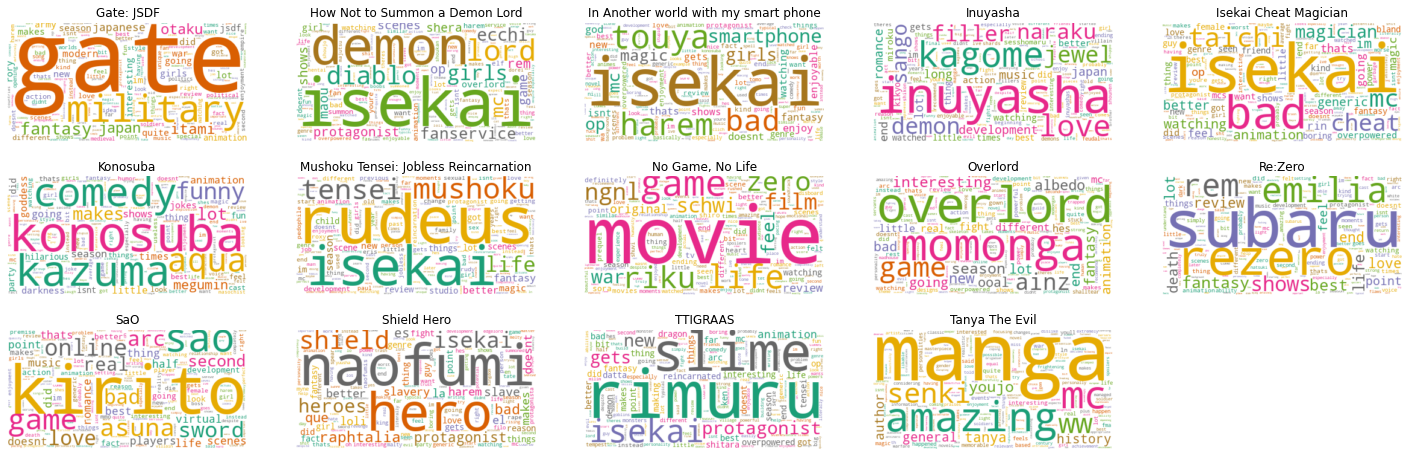

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [25 , 8]

i = 0
for show, vec in reviews_filtered_dtm.iterrows():
  # generate_from_frequencies ignores stopwords
  wc.generate_from_frequencies(vec)

  plt.subplot(3,5, i+1)
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.title(FULL_TITLES[show])
  i += 1

plt.show()